#Problem Statement
Introduction
This data set is a masked data set which is similar to what data analysts at Uber handle. Solving
this assignment will give you an idea about how problems are systematically solved using EDA
and data visualisation.
Business Understanding
You may have some experience of travelling to and from the airport. Have you ever used Uber
or any other cab service for this travel? Did you at any time face the problem of cancellation by
the driver or non-availability of cars?
Well, if these are the problems faced by customers, these very issues also impact the business
of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its
revenue.
As an analyst, you decide to address the problem Uber is facing - driver cancellation and
non-availability of cars leading to loss of potential revenue.
Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and
non-availability of cars) and recommend ways to improve the situation. As a result of your
analysis, you should be able to present to the client the root cause(s) and possible hypotheses
of the problem(s) and recommend ways to improve them.
Data Understanding
Download the dataset from below.
https://drive.google.com/file/d/1qxKTDG3cIJFW98Xt1YbM1Q6fwvjqpcId/view?usp=sharing
There are six attributes associated with each request made by a customer:
1. Request id: A unique identifier of the request
2. Time of request: The date and time at which the customer made the trip request
3. Drop-off time: The drop-off date and time, in case the trip was completed
4. Pick-up point: The point from which the request was made
5. Driver id: The unique identification number of the driver
6. Status of the request: The final status of the trip, that can be either completed, cancelled
by the driver or no cars available
Note: For this assignment, only the trips to and from the airport are being considered.
Data Cleaning and Preparation - Hints
1. Identify the data quality issues and clean the data so that you can use it for analysis.
2. Ensure that the dates and time are in the proper format. Derive new variables which will
be useful for analysis.
Results Expected
1. Visually identify the most pressing problems for Uber.
a. Hint: Create plots to visualise the frequency of requests that get cancelled or
show 'no cars available'; identify the most problematic types of requests (city to
airport / airport to city etc.) and the time slots (early mornings, late evenings etc.)
using plots
2. Find out the gap between supply and demand and show the same using plots.
a. Find the time slots when the highest gap exists
b. Find the types of requests (city-airport or airport-city) for which the gap is the
most severe in the identified time slots
3. What do you think is the reason for this issue for the supply-demand gap? Write the
answer in less than 100 words. You may accompany the write-up with plot(s).
4. Recommend some ways to resolve the supply-demand gap.


In [2]:
# import liberies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import data set

In [5]:
uber_data = pd.read_csv('uber Request Data.csv')

In [6]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
# lets know the data

In [8]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [9]:
uber_data.shape

(6745, 6)

In [10]:
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [11]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [12]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [13]:
uber_data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [14]:
uber_data['Request id'].nunique()

6745

In [15]:
uber_data['Pickup point'].nunique()

2

In [16]:
uber_data['Driver id'].nunique()

300

In [17]:
uber_data['Status'].nunique()

3

In [18]:
uber_data['Request timestamp'].nunique()

5618

In [19]:
uber_data['Drop timestamp'].nunique()


2598

In [20]:
#percentage wise null value

In [21]:
uber_data.isnull().sum()/uber_data.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [22]:
uber_data["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 9:40         6
11/7/2016 8:37         6
11/7/2016 22:00        5
                      ..
13-07-2016 19:56:20    1
14-07-2016 18:30:56    1
15-07-2016 17:59:51    1
14-07-2016 20:15:50    1
11/7/2016 19:29        1
Name: Request timestamp, Length: 5618, dtype: int64

In [23]:
uber_data["Request timestamp"] = uber_data["Request timestamp"].astype(str)

In [24]:
uber_data["Request timestamp"] = uber_data["Request timestamp"].replace("/","-")

In [25]:
uber_data["Request timestamp"] = pd.to_datetime(uber_data["Request timestamp"],dayfirst=True)

In [26]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,11/7/2016 7:25


In [27]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [28]:
uber_data["Drop timestamp"] = pd.to_datetime(uber_data["Drop timestamp"],dayfirst=True)

In [29]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [30]:
req_hour=uber_data["Request timestamp"].dt.hour

In [31]:
uber_data["req_hour"]=req_hour

In [32]:
req_day=uber_data["Request timestamp"].dt.day

In [33]:
uber_data["req_day"]=req_day

In [34]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11


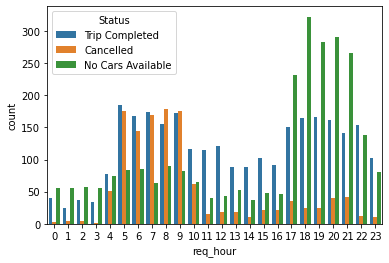

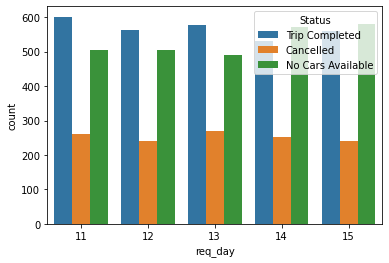

In [35]:
sns.countplot(x="req_hour",data=uber_data,hue="Status")
plt.show()
sns.countplot(x="req_day",data=uber_data,hue="Status")
plt.show()

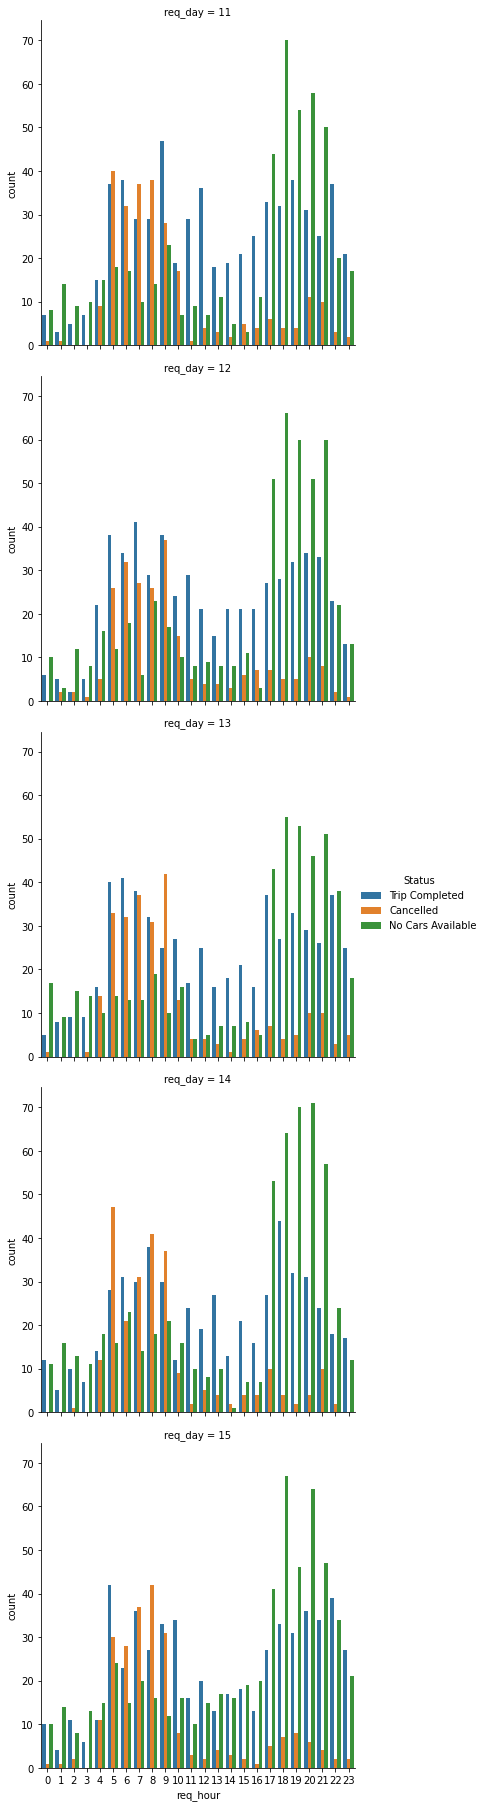

In [36]:
sns.factorplot(x="req_hour",data=uber_data,row="req_day",hue="Status",kind="count")
plt.show()

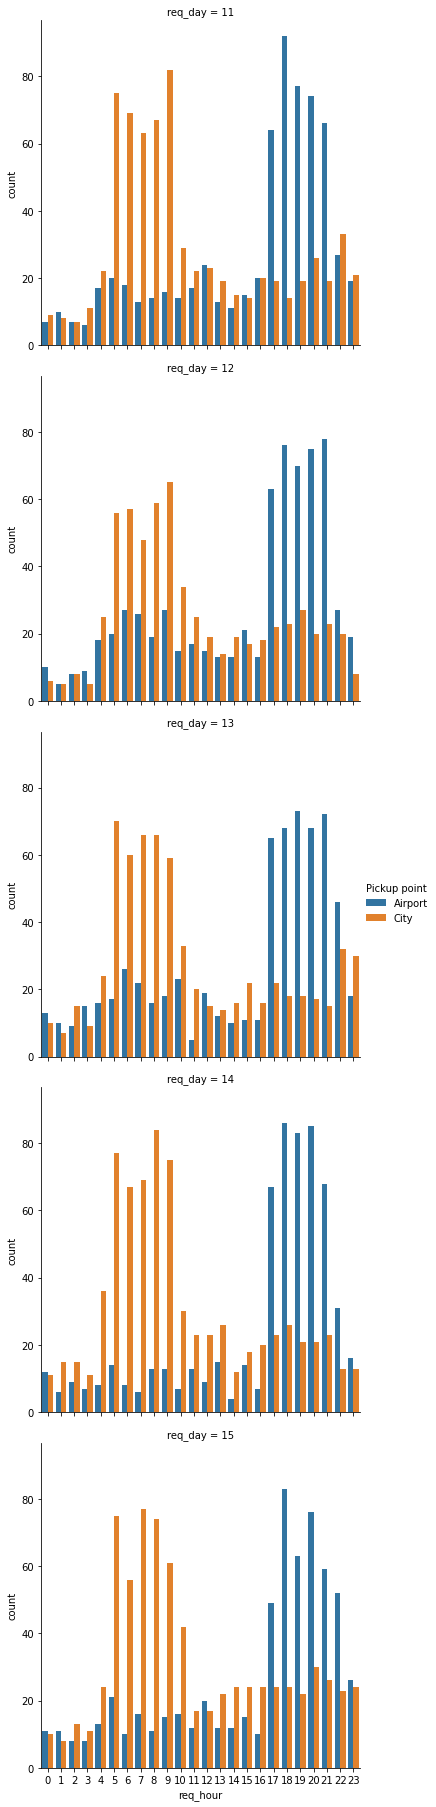

In [37]:
sns.factorplot(x="req_hour",data=uber_data,row="req_day",hue="Pickup point",kind="count")
plt.show()

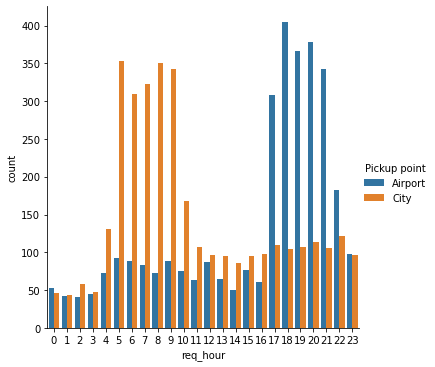

In [38]:
sns.factorplot(x="req_hour",data=uber_data,hue="Pickup point",kind="count")
plt.show()

In [39]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [40]:
uber_data["Time_Slot"]=0

In [41]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [42]:
j=0
for i in uber_data["req_hour"]:
    if uber_data.iloc[j,6]<5:
        uber_data.iloc[j,8]="Pre_Morning"
    elif 5<=uber_data.iloc[j,6]<10:
        uber_data.iloc[j,8]="Morning_Rush"
        
    elif 10<=uber_data.iloc[j,6]<17:
        uber_data.iloc[j,8]="Day_Time"
        
    elif 17<=uber_data.iloc[j,6]<22:
        uber_data.iloc[j,8]="Evening_Rush"
    else:
        uber_data.iloc[j,8]="Late_Night"
    j=j+1

In [43]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [44]:
uber_data["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

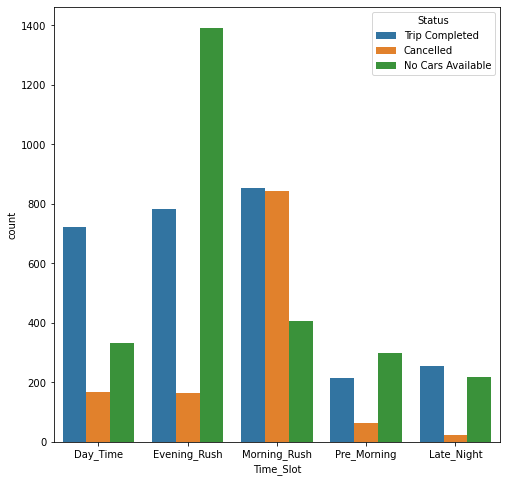

In [45]:
plt.figure(figsize=(8,8))
sns.countplot(x="Time_Slot",hue="Status",data=uber_data)
plt.show()

In [46]:
uber_data_morning_rush=uber_data[uber_data['Time_Slot']=='Morning_Rush']

In [47]:
#Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [48]:
uber_data_airport_cancelled = uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="Airport") & (uber_data_morning_rush["Status"]=="Cancelled")]

In [50]:
uber_data_airport_cancelled.shape

(23, 9)

In [51]:
uber_data_city_cancelled = uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="City") & (uber_data_morning_rush["Status"]=="Cancelled")]

In [52]:
uber_data_city_cancelled.shape

(820, 9)

In [54]:
#supply and demand

In [53]:
uber_data_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [55]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [56]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="City") & (uber_data_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [57]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [58]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="Airport") & (uber_data_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [59]:
# Supply and Demand for evening rush

In [60]:
uber_data_evening_rush = uber_data[uber_data["Time_Slot"]=="Evening_Rush"]

In [61]:
uber_data_city_cancelled=uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="City") & (uber_data_evening_rush["Status"]=="Cancelled")]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

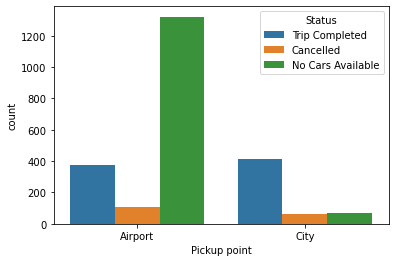

In [62]:
sns.countplot(x="Pickup point",hue="Status",data=uber_data_evening_rush)

In [63]:
uber_data_city_cancelled.shape[0]

60

In [64]:
uber_data_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [65]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="City")].shape[0]

542

In [66]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="City") & (uber_data_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [67]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [68]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="Airport") & (uber_data_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [69]:
# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [72]:
#evening rush

In [81]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="Airport") & (uber_data_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [71]:
uber_data_evening_rush.loc[(uber_data_evening_rush["Pickup point"]=="City") & (uber_data_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [73]:
 #Severity of problem by location in morning rush

In [78]:
uber_data_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [82]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="Airport") & (uber_data_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [80]:
uber_data_morning_rush.loc[(uber_data_morning_rush["Pickup point"]=="City") & (uber_data_morning_rush["Status"]=="Cancelled")].shape[0]

820